### Project Introduction

This project focuses on building and training a Convolutional Neural Network (CNN) for image classification. The primary objective is to demonstrate how deep learning architectures can automatically learn spatial hierarchies of features from raw image data, outperforming traditional machine learning methods in tasks involving visual recognition.

### Objectives

Preprocess and normalize the dataset for effective training.

Design and implement a CNN architecture with multiple layers (convolution, pooling, dense, etc.).

Train the model and monitor performance across epochs.

Evaluate the model using accuracy, loss curves, and confusion matrices.

Demonstrate the effectiveness of CNNs in extracting features and improving classification performance.

### Importance

CNNs have become the foundation of modern computer vision, powering applications such as self-driving cars, facial recognition, and medical imaging. Through this project, the workflow of building, training, and evaluating a CNN is demonstrated, serving as a practical introduction to deep learning in real-world applications.

##  Data Loading and Preprocessing

In this step, we load the dataset, normalize pixel values for faster convergence, and prepare the data for CNN training. A few samples are visualized to confirm correctness.


Training Set Shape (60000, 28, 28, 1)
Testing Set Shape (10000, 28, 28, 1)
The Number of Classes 2


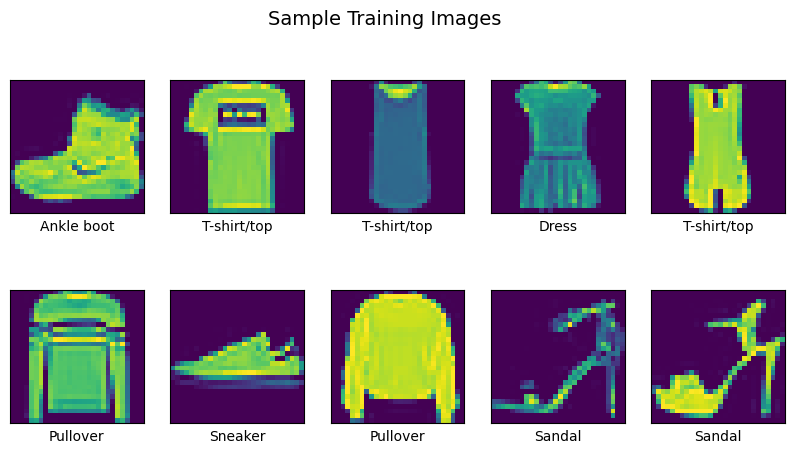

In [2]:
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('Training Set Shape', X_train.shape)
print('Testing Set Shape', X_test.shape)
print('The Number of Classes', len(np.unique(y_train)))

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.suptitle("Sample Training Images", fontsize=14)
plt.show()

## Building the CNN Model

We now define a Convolutional Neural Network (CNN) using Keras Sequential API.  
The model includes convolutional layers for feature extraction, pooling layers for dimensionality reduction, dropout for regularization, and dense layers for final classification.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import Input


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   

model = Sequential([
    Input(shape=[28,28,1]),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN Model

We now train the CNN model using the Fashion MNIST dataset.  
Early stopping is applied to prevent overfitting, and training progress is visualized using accuracy and loss curves.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.2,
    height_shift_range = 0.3
)

datagen.fit(X_train)

early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(datagen.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stop])

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'The Loss percentage: {test_loss:.2%}')
print('*****************************************************')
print(f'The Accuracy percentage: {test_accuracy:.2%}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.7897 - loss: 0.5791 - val_accuracy: 0.8490 - val_loss: 0.4154
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7931 - loss: 0.5656 - val_accuracy: 0.8501 - val_loss: 0.4071
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7943 - loss: 0.5627 - val_accuracy: 0.8536 - val_loss: 0.4029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7968 - loss: 0.5549 - val_accuracy: 0.8524 - val_loss: 0.3972
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7966 - loss: 0.5548 - val_accuracy: 0.8543 - val_loss: 0.3975
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8015 - loss: 0.5476 - val_accuracy: 0.8487 - val_loss: 0.4075
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8020 - loss: 0.5446 - val_accuracy: 0.8510 - val_loss: 0.4046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8010 -

## Evaluating the CNN Model

After training, the model is evaluated on the test set to measure its classification performance.
Predictions are compared with the true labels, and evaluation metrics such as precision, recall, F1-score, and support are reported for each Fashion MNIST class.
A confusion matrix is also generated to visualize misclassifications and identify classes that the model struggles with.

In [12]:
predictions = model.predict(X_test)
import numpy as np

y_pred = np.argmax(predictions, axis=1)

y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

cl = classification_report(y_true, y_pred, target_names=class_names)
cm = confusion_matrix(y_true, y_pred)

print('Classification Report for CNN Model:')
print('*****************************************************')
print(cl)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report for CNN Model:
*****************************************************
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.87      0.81      1000
       Dress       0.82      0.90      0.86      1000
        Coat       0.75      0.75      0.75      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.69      0.43      0.53      1000
     Sneaker       0.90      0.98      0.94      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.97      0.92      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



### Confusion Matrix Analysis

The confusion matrix provides a detailed breakdown of the model’s predictions compared to the true labels.
It highlights the number of correct classifications along the diagonal and the misclassifications off-diagonal.
This visualization helps identify which Fashion MNIST classes the model distinguishes well and which categories are most frequently confused with each other.

Confusion Matrix for CNN Model:
*****************************************************
[[850   0  29  57   6   2  40   0  14   2]
 [  3 966   1  23   3   0   2   0   1   1]
 [ 13   0 868   9  58   0  48   0   4   0]
 [ 24   4   8 903  29   2  21   0   8   1]
 [  1   2 105  52 754   0  78   0   8   0]
 [  0   0   0   0   0 955   0  32   3  10]
 [216   2 118  57 151   0 432   0  24   0]
 [  0   0   0   0   0  11   0 978   0  11]
 [  2   0   5   2   5   2   5   3 974   2]
 [  0   0   0   1   0   7   0  69   1 922]]


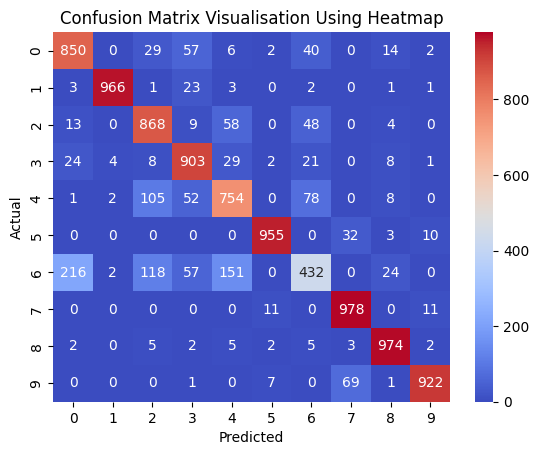

In [13]:
print('Confusion Matrix for CNN Model:')
print('*****************************************************')
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix Visualisation Using Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Sample Predictions

To better interpret the CNN’s performance, a few test images are visualized along with their predicted labels and true labels.
This step provides an intuitive way to inspect the model’s strengths and weaknesses, showing where it correctly classifies images and where it struggles with misclassifications.

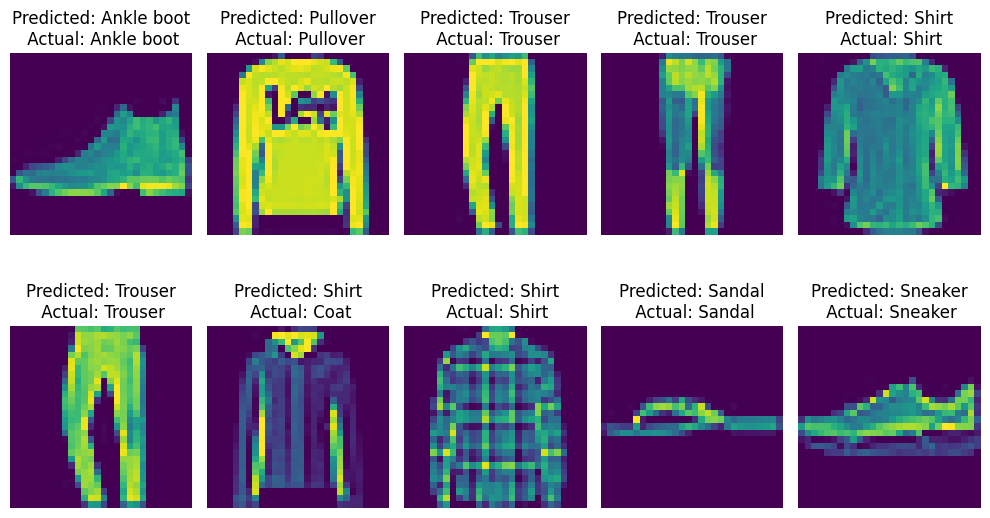

In [14]:
plt.figure(figsize=(10,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28,1))
    plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}\n Actual: {class_names[y_true[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Accuracy Curve

The training and validation accuracy are plotted across epochs to evaluate the model’s learning progress.

The training accuracy shows how well the CNN fits the training data.

The validation accuracy indicates how well the model generalizes to unseen data.

Comparing both curves helps detect signs of overfitting or underfitting during training.

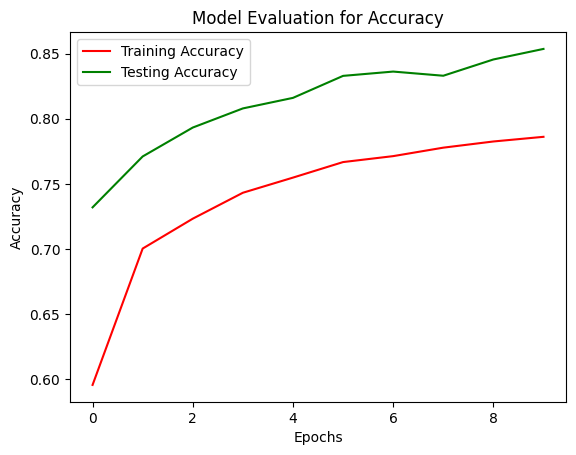

In [15]:
plt.plot(result.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(result.history['val_accuracy'], label = 'Testing Accuracy', color='green')
plt.title('Model Evaluation for Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Curve

The training and validation loss are plotted across epochs to assess how well the CNN optimizes during learning.

The training loss reflects how well the model fits the training data.

The validation loss shows generalization ability on unseen data.

A stable and decreasing validation loss indicates good learning, while divergence between training and validation losses may suggest overfitting.

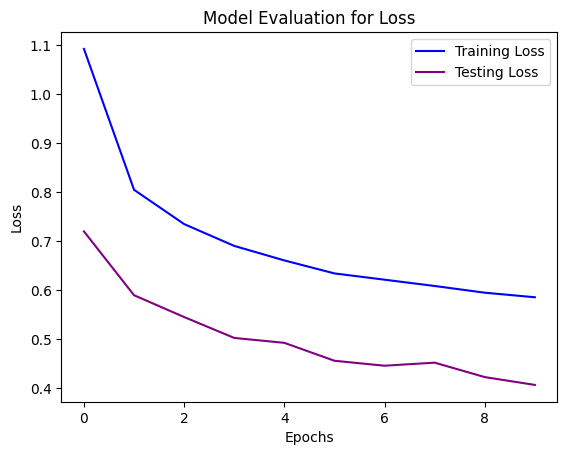

In [16]:
plt.plot(result.history['loss'], label='Training Loss', color='blue')
plt.plot(result.history['val_loss'], label = 'Testing Loss', color='purple')
plt.title('Model Evaluation for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Conclusion

In this project, we successfully built and trained a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset.
The workflow covered data preprocessing, model architecture design, training with data augmentation, and thorough evaluation.

## Key Outcomes

The CNN achieved strong classification accuracy on the test dataset.

Data augmentation improved generalization by exposing the model to diverse variations of training images.

Early stopping prevented overfitting and ensured efficient training.

Evaluation metrics (classification report, confusion matrix, and sample predictions) provided detailed insights into class-wise performance.

Accuracy and loss curves confirmed stable learning and good generalization.

## Takeaways

CNNs are highly effective for image recognition tasks.

Proper regularization techniques (dropout, augmentation, early stopping) significantly boost performance.

Visual diagnostics (curves, confusion matrix, sample predictions) are essential for understanding model behavior beyond raw accuracy.